In [1]:
# Created by: Jessica Gallo
# CSC 732 Pattern Recognition & Neural Networks
# Final Project
# Part 1 
# Image Classification with Convolutional Neural Networks
# Problem 2

# Created: 4/23/2020
# Last Modified: 4/27/2020

In [2]:
# Libraries
import os, shutil
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# DATA PREPROCESSING
print("DATA PREPROCESSING")
# use shuffling, normalized minibatches, augmentation, address 
# the problem of hyperparameter initialization (use Glorot)
# Display visualization(c, e, f from problem1 ) for your new dataset. 
train_dir = "./Downloads/training_set"
test_dir = "./Downloads/testing_set"
validation_dir = "./Downloads/validation_set"
#rescales all imaged by 1/255
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (320, 258),
    batch_size = 20,
    class_mode = 'categorical'
)


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (320, 258),
    batch_size = 20,
    class_mode = 'categorical')

# each data batch has shape of (20, 320, 258, 3)
# and labels bactch has the shape of (20, 12)

DATA PREPROCESSING
Found 12513 images belonging to 12 classes.
Found 3909 images belonging to 12 classes.


In [4]:
# DEFINING CONVNET MODEL WITH SGD OPTIMIZER AND NESTEROV MOMENTUM

In [5]:
# building convnet model
# model shoud include 4-5 conv layers, dropout layer and at least 2 FC layer
# conv2d->maxPooling2d->con2d->maxPooling2d->conv2d->maxPooling2d -> con2d -> maxPooling2d -> dropOut -> FC -> FC
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape = (320, 258, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(.5))
model.add(layers.Dense(512, activation='relu', 
                       kernel_initializer = 'glorot_normal', 
                       bias_initializer = 'zeros'))
model.add(layers.Dense(516, activation='relu'))
model.add(layers.Dense(12, activation='sigmoid'))
model.summary()

# Adam optimizer with Nesterov momentum

adam = optimizers.Adam(lr = 0.001, beta_1 = .9, beta_2 = 0.999, amsgrad = False)
#applying ptimizer to out model
model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ["acc"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 159, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 157, 126, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 28, 128)       1

In [6]:
# TRAINING OUR CONVNET

In [7]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 50,
    shuffle = True)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 [==============================] - 401s 4s/step - loss: 2.2412 - acc: 0.1365 - val_loss: 1.9296 - val_acc: 0.1960
Epoch 2/20
100/100 [==============================] - 383s 4s/step - loss: 1.9544 - acc: 0.1745 - val_loss: 1.8956 - val_acc: 0.1580
Epoch 3/20
100/100 [==============================] - 400s 4s/step - loss: 1.8019 - acc: 0.2115 - val_loss: 1.7011 - val_acc: 0.2210
Epoch 4/20
100/100 [==============================] - 388s 4s/step - loss: 1.6683 - acc: 0.2358 - val_loss: 1.7078 - val_acc: 0.1940
Epoch 5/20
100/100 [==============================] - 440s 4s/step - loss: 1.6868 - acc: 0.2680 - val_loss: 1.6851 - val_acc: 0.3380
Epoch 6/20
100/100 [==============================] - 415s 4s/step - loss: 1.3880 - acc: 0.3783 - val_loss: 1.5221 - val_acc: 0.3320
Epoch 7/20
100/100 [=============

In [8]:
# save model
model.save('fruit_classification_adam.h5')

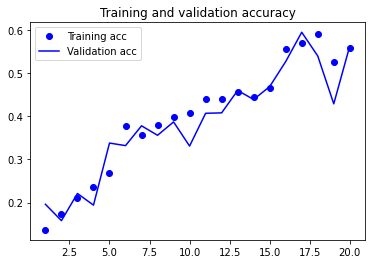

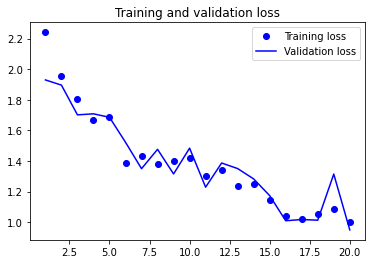

<Figure size 432x288 with 0 Axes>

In [9]:
'''
visualize performance
'''
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) +1)
#  plot of accuracy
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# plot of loss
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.show()

Using TensorFlow backend.


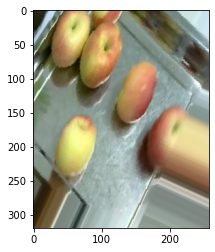

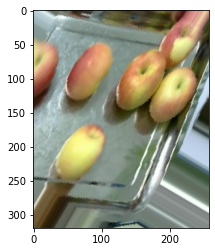

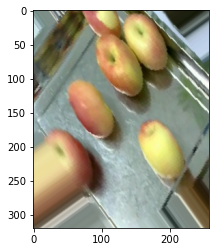

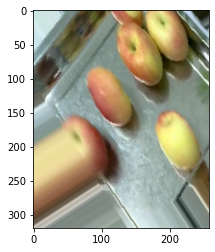

In [10]:
'''
display some randomly augmented pictures
'''
from keras.preprocessing import image
train_apples_dir = './Downloads/training_set/Apple'

fnames = [os.path.join(train_apples_dir, fname) for
          fname in os.listdir(train_apples_dir)]

img_path = fnames[6]  #choosing an image to augment

img = image.load_img(img_path, target_size = (320, 258))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4 == 0:
        break
    
plt.show()

Image tensor shape:  (1, 320, 258, 3)


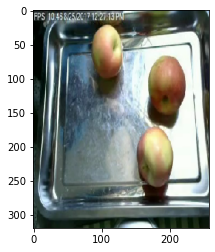

In [21]:
'''
Visualizing intermidiate activations
'''
# get the image from the test set

img_path = "./Downloads/testing_set/Apple/Apple 03343.png"

import numpy as np
img1 = image.load_img(img_path, target_size = (320, 258))
img_tensor = image.img_to_array(img1)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

print("Image tensor shape: ", img_tensor.shape)

#display the test image

plt.imshow(img_tensor[0])
plt.show()

In [22]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor) #returns a list of five numpy arrays

n_col: 2
n_col: 2


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


n_col: 4
n_col: 4
n_col: 8
n_col: 8
n_col: 8
n_col: 8


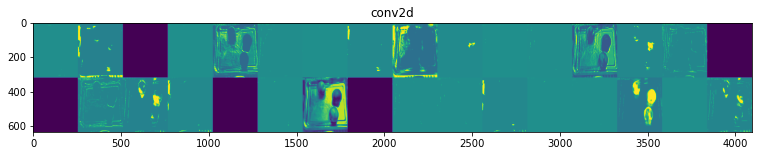

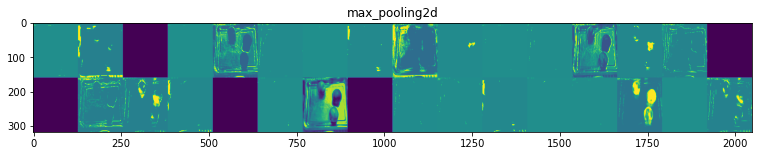

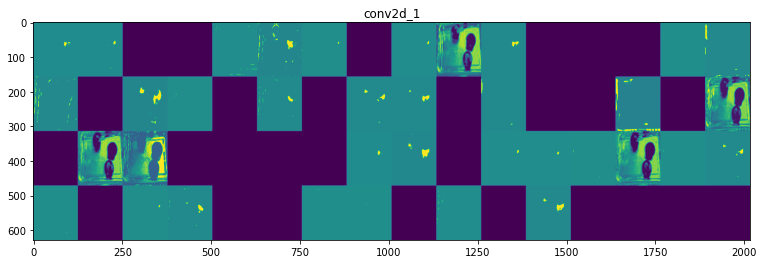

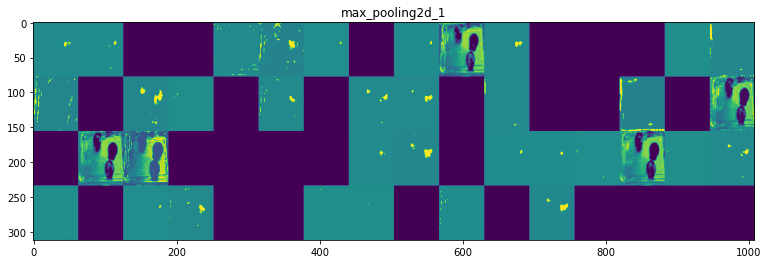

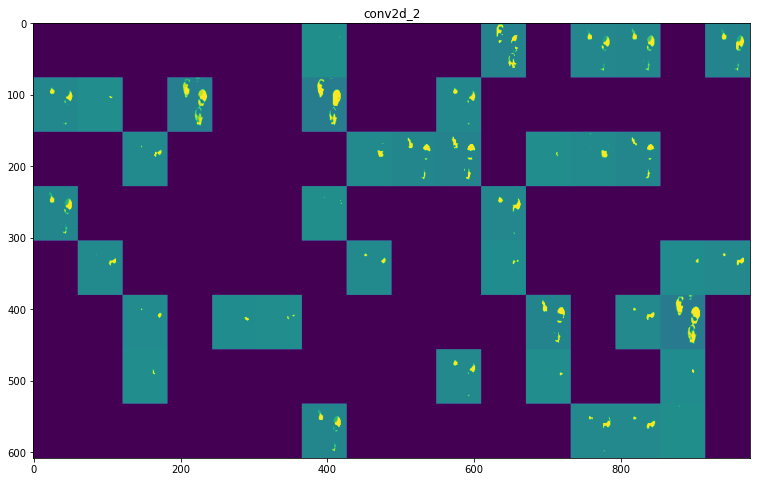

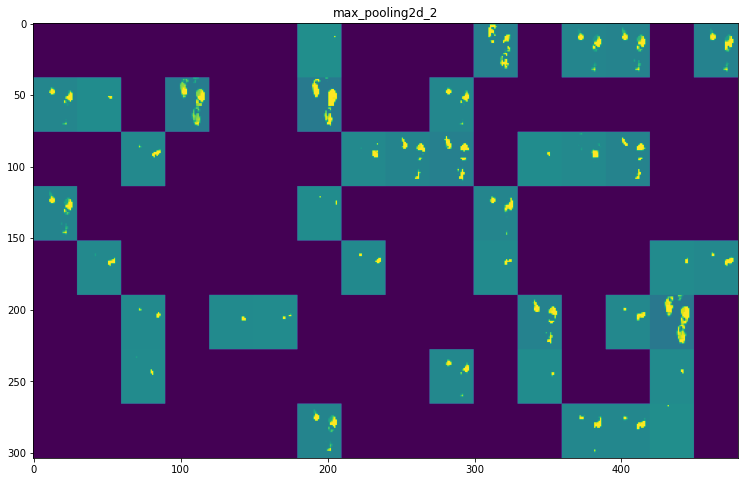

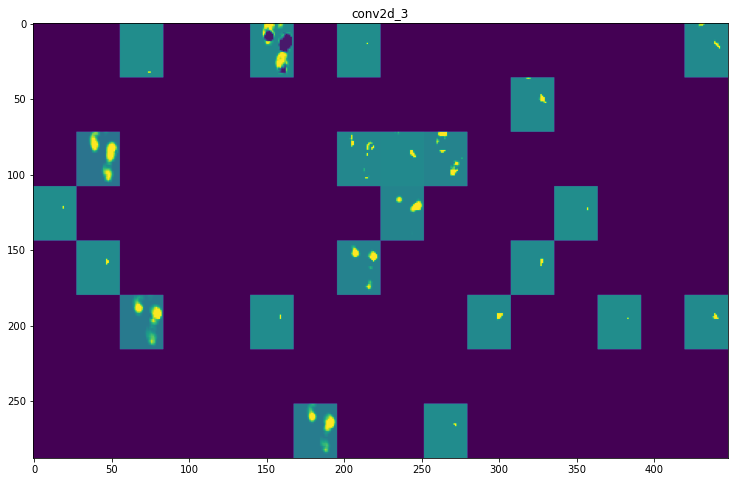

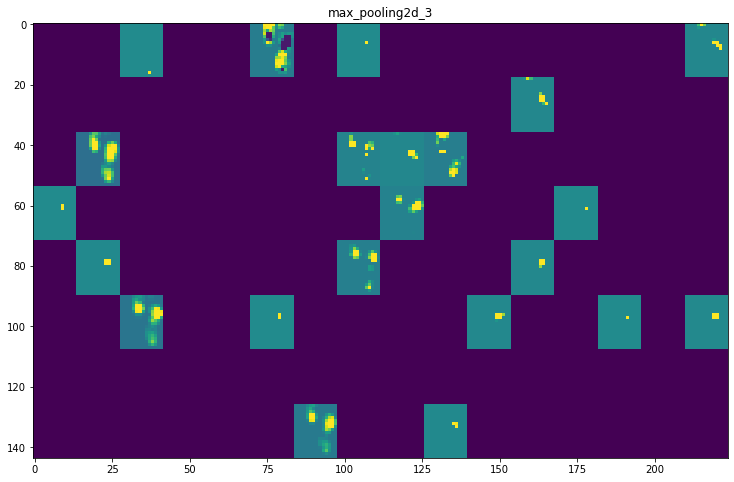

In [28]:
# name of the layers..

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
   

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
   
    size = layer_activation.shape[1]
    size2 = layer_activation.shape[2]
    n_cols = n_features // images_per_row
   
    display_grid = np.zeros((size * n_cols, images_per_row * size2))
    print("n_col:", n_cols)
   
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image +=128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
           # print("col: ", col)
            #print("row: ", row)
            #print("size: ", size)
            display_grid[col * size : (col+1) * size,
                         row * size2 : (row + 1) * size2] = channel_image
           
    scale = 1./ size
    plt.figure(figsize = (scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


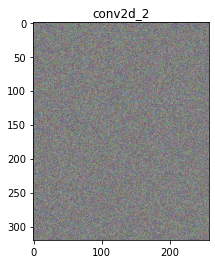

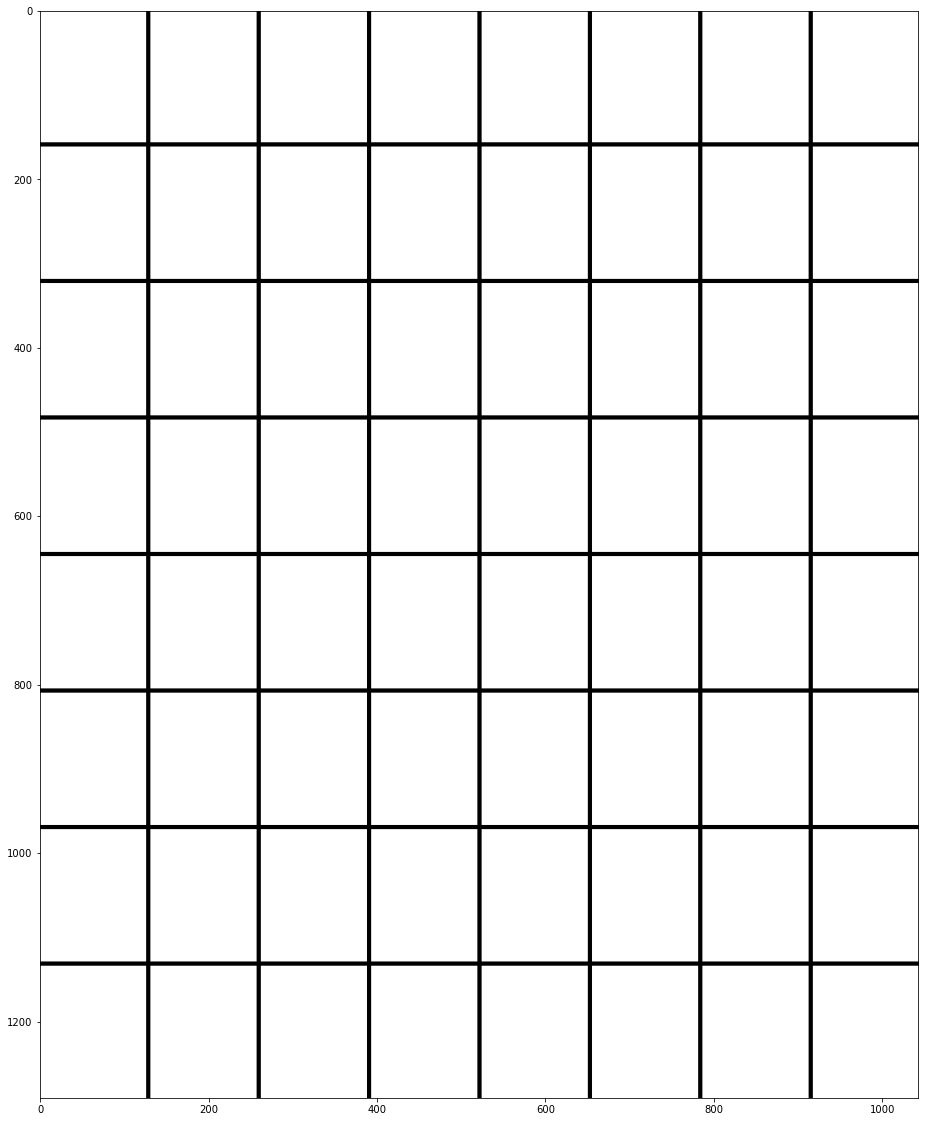

In [29]:
'''
Visualizing convnet filters...
'''


from keras import backend as K

layer_name = 'conv2d_1'
filter_index = 0


def deprocess_image(x):
    x -= x.mean()                   # normalize tensor
    x /= (x.std() + 1e-5)
    x *= 0.1
   
    x += 0.5
    x = np.clip(x, 0, 1)
   
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x


# function to generate filter visualizations
   
def generate_pattern (layer_name, filter_index, l = 320, w = 258):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:, filter_index])
   
    grads = K.gradients(loss, model.input)[0]
   
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1,l,w,3)) * 20 + 128
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
   
        input_img_data += grads_value * step
    img2 = input_img_data[0]
    return deprocess_image(img2)
   

# check...
plt.imshow(generate_pattern(layer_name, 0))
plt.title(layer_name)

plt.imshow(generate_pattern('conv2d_2', 0))
plt.title('conv2d_2')


#=============================================================
layer_name = 'conv2d_1'
size = 64
l = 157
w = 126
margin = 5

results = np.zeros((8*l + 7*margin, 8*w + 7*margin, 3))

for i in range (8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i+(j*8), l = l, w = w )
       
        horizontal_start = i*l+ i*margin
        horizontal_end = horizontal_start + l
        vertical_start = j*w + j*margin
        vertical_end = vertical_start + w
        results[horizontal_start: horizontal_end,
                vertical_start: vertical_end, :] = filter_img
       
plt.figure(figsize = (20,20))
plt.imshow(results)